In [1]:
import pandas as pd
import numpy as np

In [2]:
def create_synthetic_dataset(num_samples, num_unique_cat1, num_unique_cat2):
    # Generating categorical features
    cat_feature1 = np.random.choice(range(num_unique_cat1), num_samples)
    cat_feature2 = np.random.choice(range(num_unique_cat2), num_samples)

    # Generating continuous feature
    continuous_feature = np.random.randn(num_samples)

    # Creating DataFrame
    synthetic_data = pd.DataFrame({
        'Cat_Feature1': cat_feature1,
        'Cat_Feature2': cat_feature2,
        'Continuous_Feature': continuous_feature
    })

    return synthetic_data

In [18]:
synthetic_data = create_synthetic_dataset(100000, 160, 30)

# Displaying the first few rows of the synthetic dataset
print(synthetic_data.head())

   Cat_Feature1  Cat_Feature2  Continuous_Feature
0            20             7           -0.561123
1           138            25            1.858730
2            62             3            0.382217
3           112             6           -1.383366
4           135             7           -0.423918


In [19]:
synthetic_data

,Cat_Feature1,Cat_Feature2,Continuous_Feature
0,20,7,-0.561123
1,138,25,1.858730
2,62,3,0.382217
3,112,6,-1.383366
4,135,7,-0.423918
...,...,...,...
99995,66,23,0.994969
99996,24,23,0.037233
99997,48,15,2.445554
99998,29,21,0.596722


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def plot(feature):
  sns.set(style="whitegrid")
  plt.figure(figsize=(8, 5))

  # Plotting a histogram
  sns.histplot(feature, bins=30, kde=True, color='skyblue')

  # Set plot labels and title
  plt.xlabel('Cost')
  plt.ylabel('Frequency')
  plt.title('Distribution of Cost')

  # Show the plot
  plt.show()

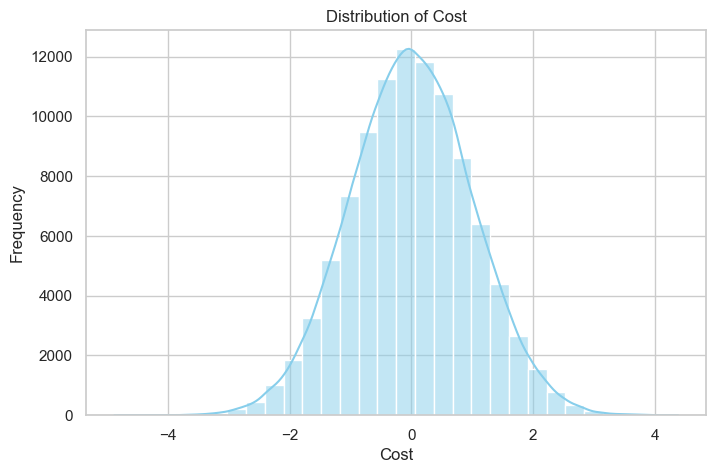

In [20]:
plot(synthetic_data['Continuous_Feature'])

In [7]:
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [25]:
# Encode categorical features
newDf = synthetic_data.copy()
cat_features = ['Cat_Feature1', 'Cat_Feature2']
for feat in cat_features:
    newDf[feat] = newDf[feat].astype('category').cat.codes

In [27]:
# Split data into train and test sets
X = newDf[['Cat_Feature1', 'Cat_Feature2']]
y = newDf['Continuous_Feature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=cat_features)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, categorical_feature=cat_features)

In [29]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 100,
    'learning_rate': 0.1,
    'max_depth': 10,
    'min_child_samples': 20,
    'max_bin': 255,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 0.001,
    'subsample_freq': 1,
    'random_state': 42
}

In [30]:
num_rounds = 1000
model = lgb.train(
    params,
    lgb_train,
    num_rounds,
    valid_sets=[lgb_train, lgb_eval],
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2
[LightGBM] [Info] Start training from score 0.000843
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	training's rmse: 1.00221	valid_1's rmse: 1.00461


In [9]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
X = synthetic_data[['Cat_Feature1', 'Cat_Feature2']]
y = synthetic_data['Continuous_Feature']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [35]:
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Evaluating the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 0.951462069642833
Test MSE: 1.0796186061502118


In [36]:
# Calculate RMSE for training set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

# Calculate RMSE for testing set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 0.9754291720277967
Test RMSE: 1.0390469701366785


C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [4]:
def create_synthetic_dataset(num_samples, num_unique_cat1, num_unique_cat2):
    # Generating categorical features
    cat_feature1 = np.random.choice(range(num_unique_cat1), num_samples)
    cat_feature2 = np.random.choice(range(num_unique_cat2), num_samples)

    # Generating continuous feature with Gaussian distribution within range 1 to 4000
    mu, sigma = 2000, 1000  # mean and standard deviation
    continuous_feature = np.random.normal(mu, sigma, num_samples)
    continuous_feature = np.clip(continuous_feature, 1, 4000)  # Clip values to ensure they are within range

    # Creating DataFrame
    synthetic_data = pd.DataFrame({
        'Cat_Feature1': cat_feature1,
        'Cat_Feature2': cat_feature2,
        'Continuous_Feature': continuous_feature
    })

    return synthetic_data


In [5]:
# Example: Creating a synthetic dataset with 1000 samples,
# 5 unique values for Cat_Feature1, and 3 unique values for Cat_Feature2
synthetic_data = create_synthetic_dataset(200000, 160, 30)

# Displaying the first few rows of the synthetic dataset
print(synthetic_data.head())

   Cat_Feature1  Cat_Feature2  Continuous_Feature
0           107            12         1163.079708
1            60            27         1684.237428
2             2            29         1477.754769
3            26            17         2888.028020
4            50             1         1762.388178


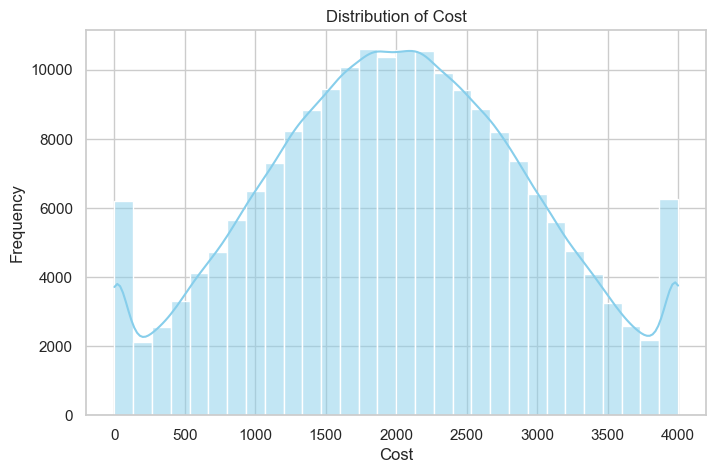

In [11]:
plot(synthetic_data['Continuous_Feature'])

In [28]:
X = synthetic_data[['Cat_Feature1','Cat_Feature2']]
y = synthetic_data['Continuous_Feature']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
rf_regressor = RandomForestRegressor(n_estimators=30, random_state=63)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=63)

In [31]:
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Evaluating the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 889366.2862935801
Test MSE: 956273.423165579


In [32]:
# Calculate RMSE for training set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

# Calculate RMSE for testing set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 943.0621858040859
Test RMSE: 977.8923372056757


C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [71]:
def create_dataset(num_samples, num_unique_cat1, num_unique_cat2,num_unique_cat3,num_unique_cat4):
    # Generating categorical features
    cat_feature1 = np.random.choice(range(num_unique_cat1), num_samples)
    cat_feature2 = np.random.choice(range(num_unique_cat2), num_samples)
    cat_feature3 = np.random.choice(range(num_unique_cat3), num_samples)
    cat_feature4 = np.random.choice(range(num_unique_cat4), num_samples)

    # Generating continuous feature with Gaussian distribution within range 1 to 4000
    mu, sigma = 2000, 1000  # mean and standard deviation
    continuous_feature = np.random.normal(mu, sigma, num_samples)
    continuous_feature = np.clip(continuous_feature, 1, 4000)  # Clip values to ensure they are within range

    # Creating DataFrame
    synthetic_data = pd.DataFrame({
        'Cat_Feature1': cat_feature1,
        'Cat_Feature2': cat_feature2,
        'Cat_Feature3': cat_feature3,
        'Cat_Feature4': cat_feature4,
        'Continuous_Feature': continuous_feature
    })

    return synthetic_data

In [72]:
synthetic_data = create_dataset(10000, 160, 30,5,10)

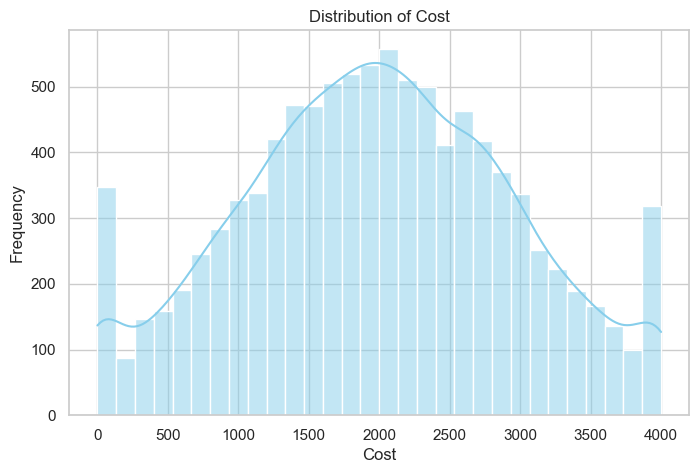

In [73]:
plot(synthetic_data['Continuous_Feature'])

In [74]:
X = synthetic_data[['Cat_Feature1', 'Cat_Feature2','Cat_Feature3','Cat_Feature4']]
y = synthetic_data['Continuous_Feature']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=63)

In [87]:
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [88]:
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Evaluating the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 161635.73176693817
Test MSE: 1083495.4695492478


In [89]:
# Calculate RMSE for training set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

# Calculate RMSE for testing set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 402.03946543459904
Test RMSE: 1040.9108845377916


C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [90]:
# Encode categorical features
newDf = synthetic_data.copy()
cat_features = ['Cat_Feature1', 'Cat_Feature2','Cat_Feature3','Cat_Feature4']
for feat in cat_features:
    newDf[feat] = newDf[feat].astype('category').cat.codes

In [91]:
# Split data into train and test sets
X = newDf[['Cat_Feature1', 'Cat_Feature2','Cat_Feature3','Cat_Feature4']]
y = newDf['Continuous_Feature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=cat_features)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, categorical_feature=cat_features)

In [93]:
num_rounds = 1000
model = lgb.train(
    params,
    lgb_train,
    num_rounds,
    valid_sets=[lgb_train, lgb_eval],
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 4
[LightGBM] [Info] Start training from score 1977.727016
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [94]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 200,
    'learning_rate': 0.1,
    'max_depth': 10,
    'min_child_samples': 20,
    'max_bin': 255,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 0.001,
    'subsample_freq': 1,
    'random_state': 42
}

In [95]:
# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=cat_features)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, categorical_feature=cat_features)

In [96]:
num_rounds = 1000
model = lgb.train(
    params,
    lgb_train,
    num_rounds,
    valid_sets=[lgb_train, lgb_eval],
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 4
[LightGBM] [Info] Start training from score 1977.727016
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [100]:
cat_features = ['Cat_Feature1', 'Cat_Feature2']
for feat in cat_features:
    newDf[feat] = newDf[feat].astype('category').cat.codes

In [101]:
# only 2 featuers
# Split data into train and test sets
X = newDf[['Cat_Feature1', 'Cat_Feature2']]
y = newDf['Continuous_Feature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=cat_features)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, categorical_feature=cat_features)

In [103]:
num_rounds = 1000
model = lgb.train(
    params,
    lgb_train,
    num_rounds,
    valid_sets=[lgb_train, lgb_eval],
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 2
[LightGBM] [Info] Start training from score 1977.727016
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -